#**Importing the Required Libraries**

In [2]:
import os
import glob
from IPython.display import Image, display
from IPython import display

# **In the First Step, We need to check whether we have access to the GPU or not**

In [3]:
!nvidia-smi

Thu Oct 12 08:10:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

#**Installing Ultralytics using Pip Install**

In [4]:
!pip install ultralytics==8.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 219.8/219.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.1 MB/s eta 0:00:00
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=b73cd2bcfdd7d37bb447e607eccd5a7007f2670684ce0c91542b29628f5ec5fa
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6a127edc45659556564c5730f6d4e300888f4bca2d4c5a88
Successfully built antlr4-python3-runtime


##Checking whether YOLOv8 is Installed and its working Fine

In [5]:
import ultralytics

In [6]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.5/78.2 GB disk)


#**Importing the Potholes Images Dataset from Roboflow**

In [7]:
#check current directory
import os

current_directory = os.getcwd()
print(current_directory)


/content


In [9]:
# Specify the path to the directory you want to set as the working directory
directory_path = '/content/drive/MyDrive/carplate'

# Use os.chdir() to change the current working directory to the specified path
os.chdir(directory_path)

# Verify that the working directory has been changed
current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")

Current Working Directory: /content/drive/MyDrive/carplate


In [10]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="T4cMJwuEZkVoqK60A9JH")
project = rf.workspace("ong-aun-jie-heuag").project("car-plate-detection-p4bwm")
dataset = project.version(1).download("yolov8")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.3/155.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled 

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.134 is required but found version=8.0.0, to fix: `pip install ultralytics==8.0.134`



Extracting Dataset Version Zip to car-plate-detection-1 in yolov8:: 100%|██████████| 2412/2412 [00:14<00:00, 168.77it/s]


#**Train the YOLOv8 Model on the Custom Dataset**

In [12]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/drive/MyDrive/carplate/car-plate-detection-1/data.yaml epochs=70 imgsz=640 #locate to yaml because yaml contain my configuration settings for my train/test/valid folders and what class to target

100% 49.7M/49.7M [00:01<00:00, 34.1MB/s]

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/carplate/car-plate-detection-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.0

#**Displaying the Confusion Matrix**

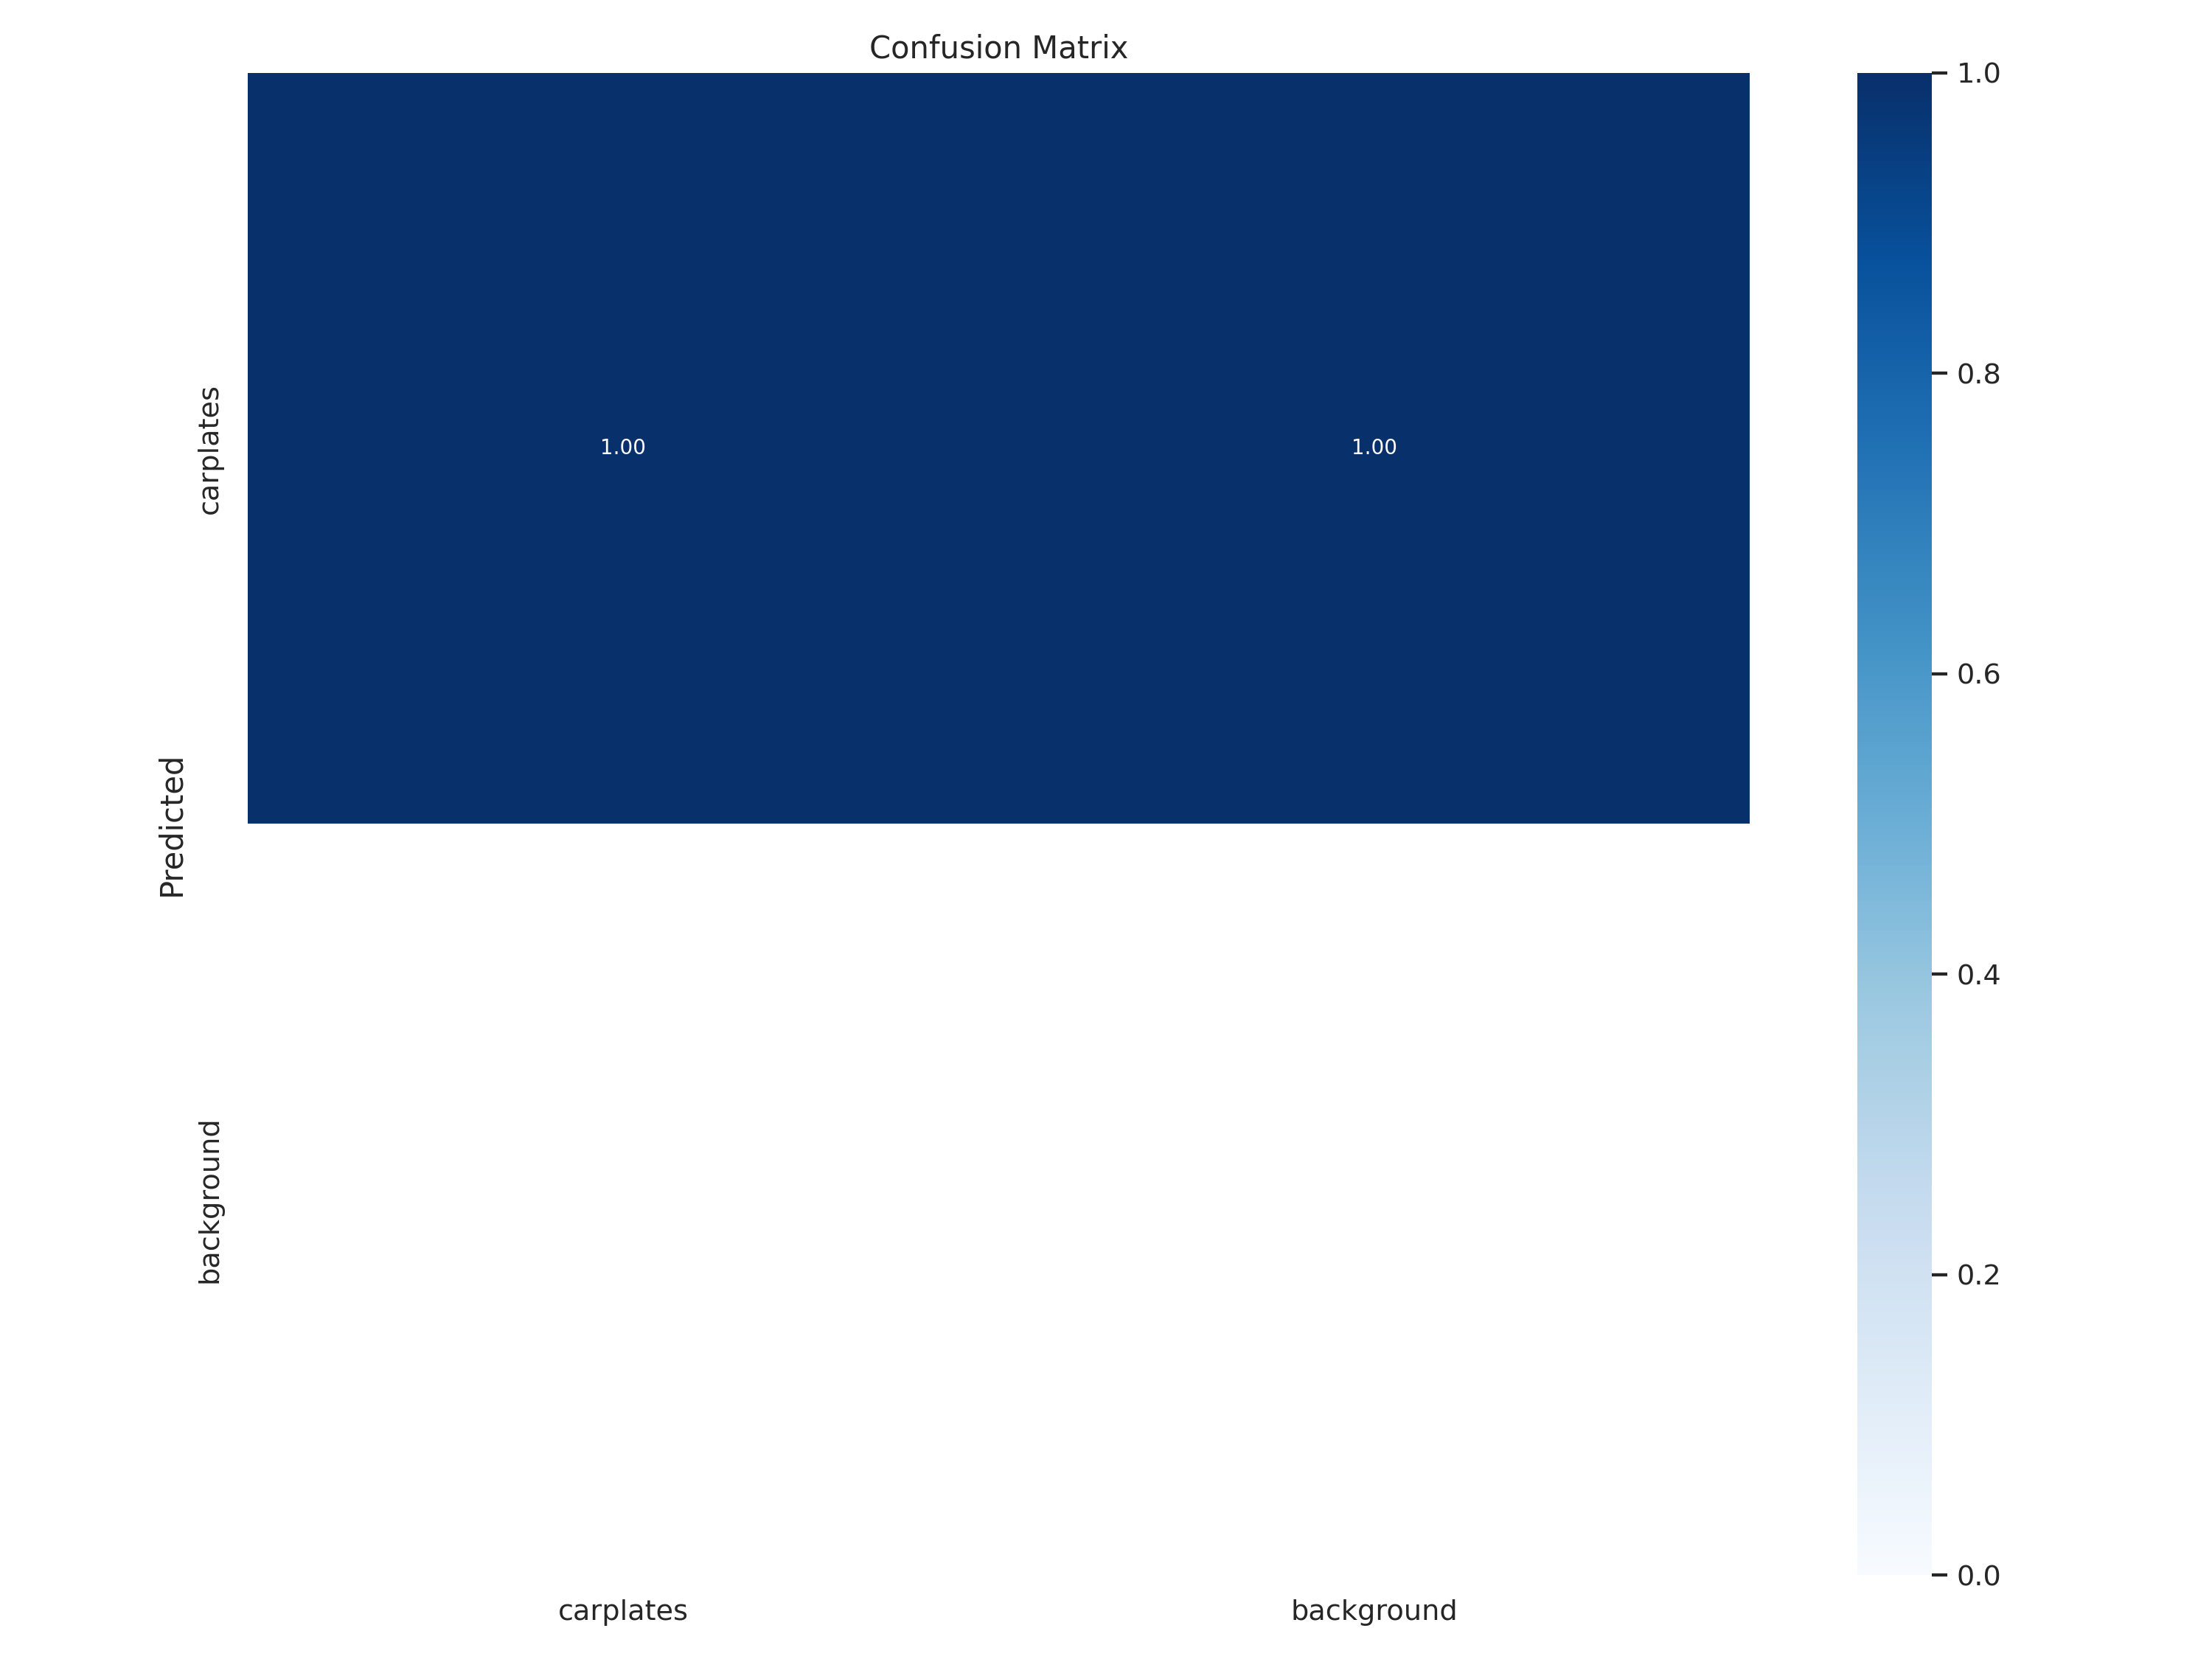

In [15]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
Image('/content/drive/MyDrive/carplate/runs/detect/train/confusion_matrix.png', width=900)

#**Training and Validation Loss**

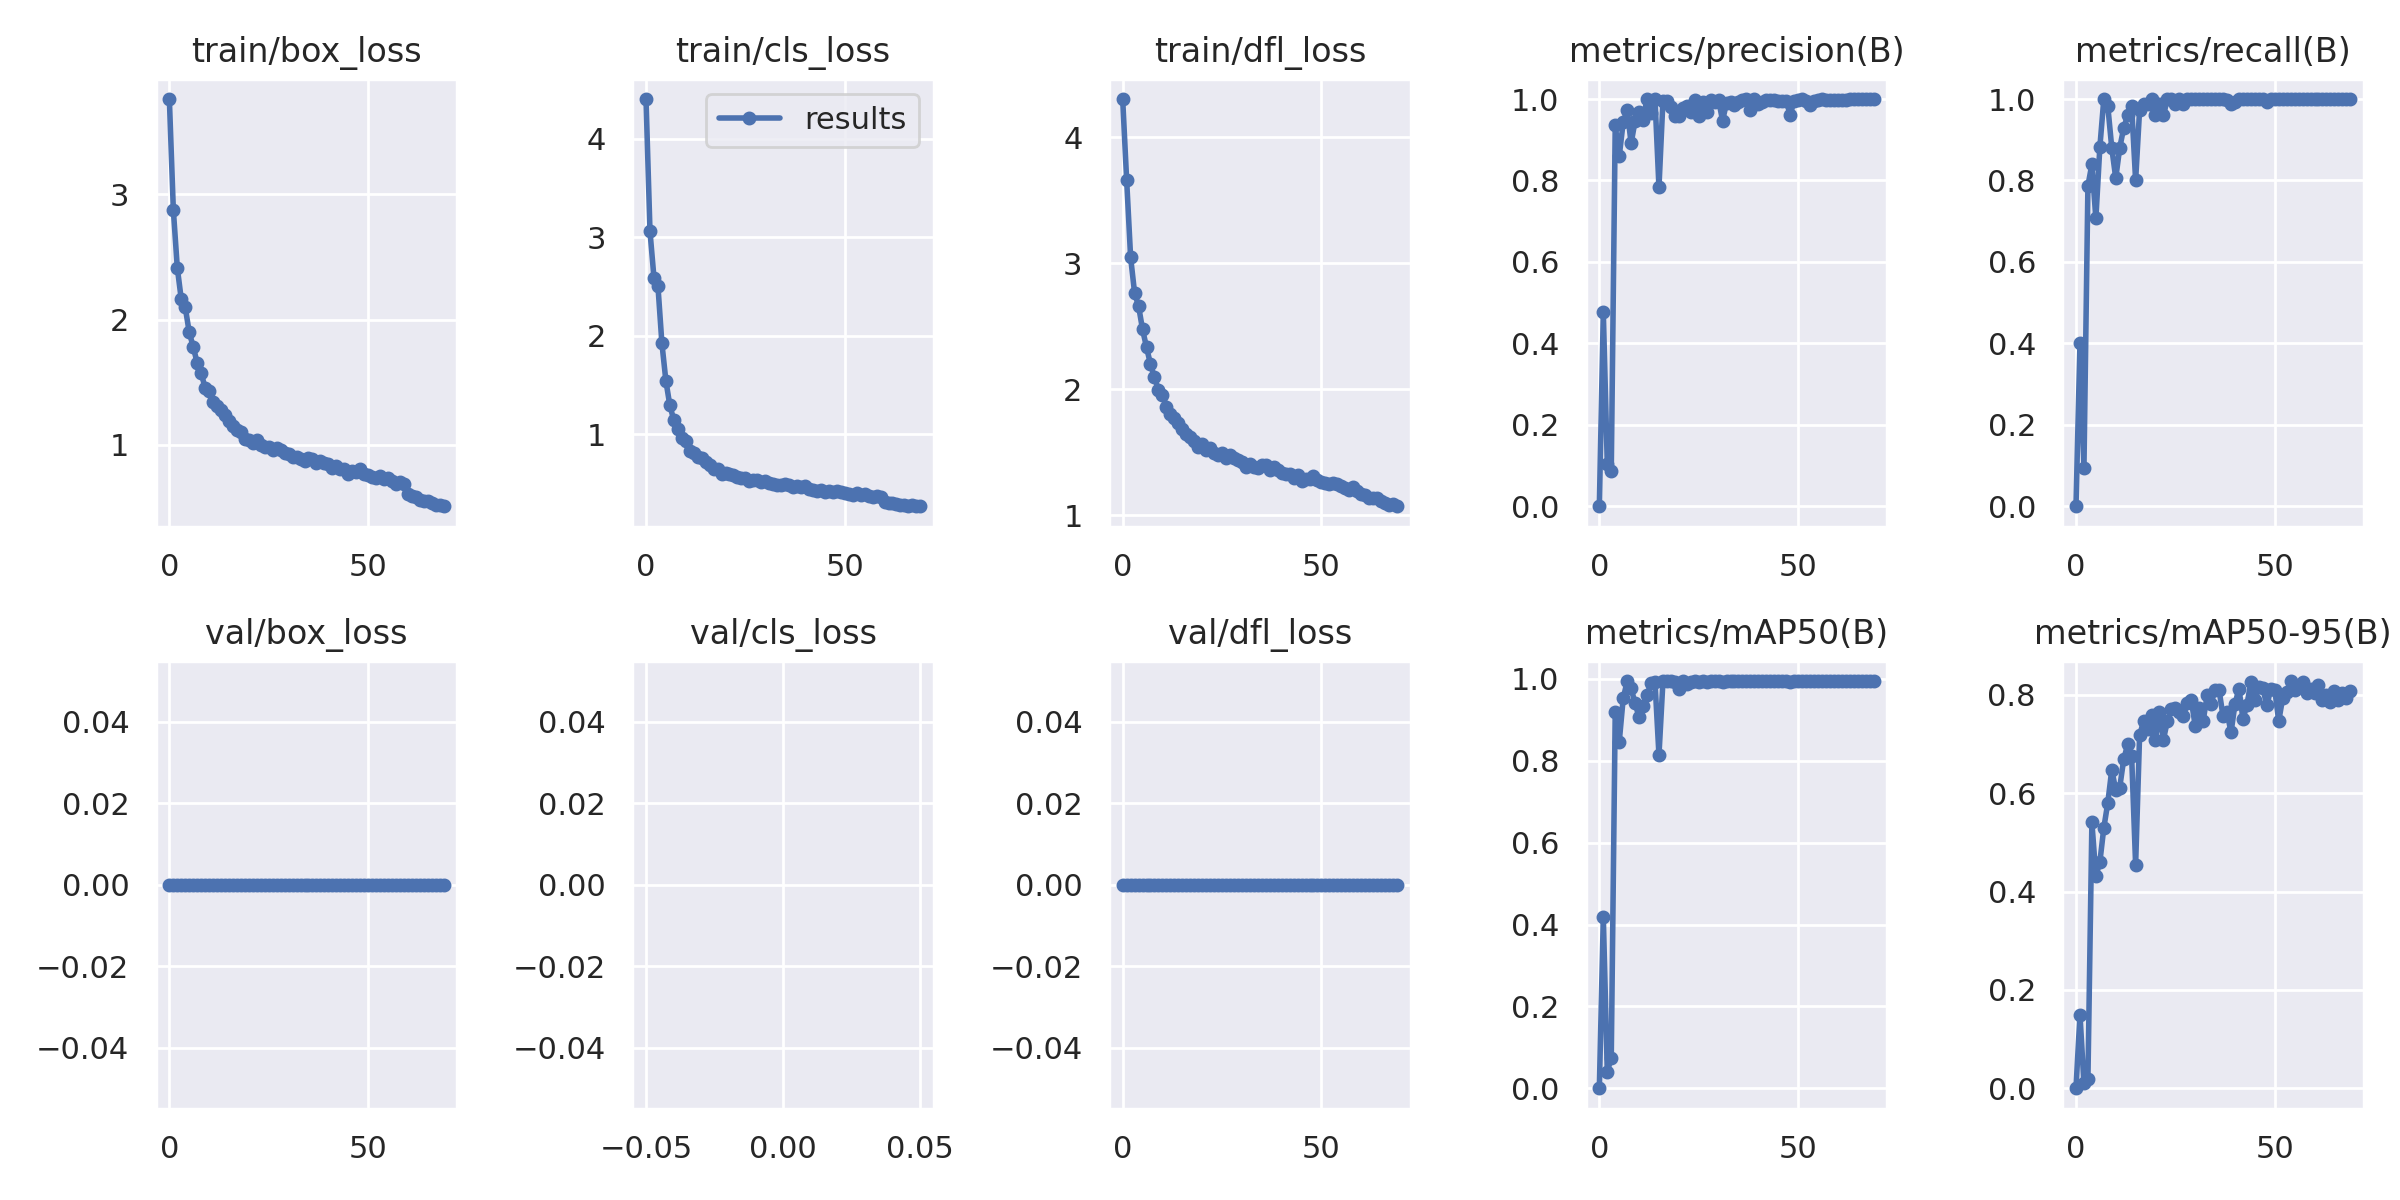

In [16]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results

Image('/content/drive/MyDrive/carplate/runs/detect/train/results.png', width=600)

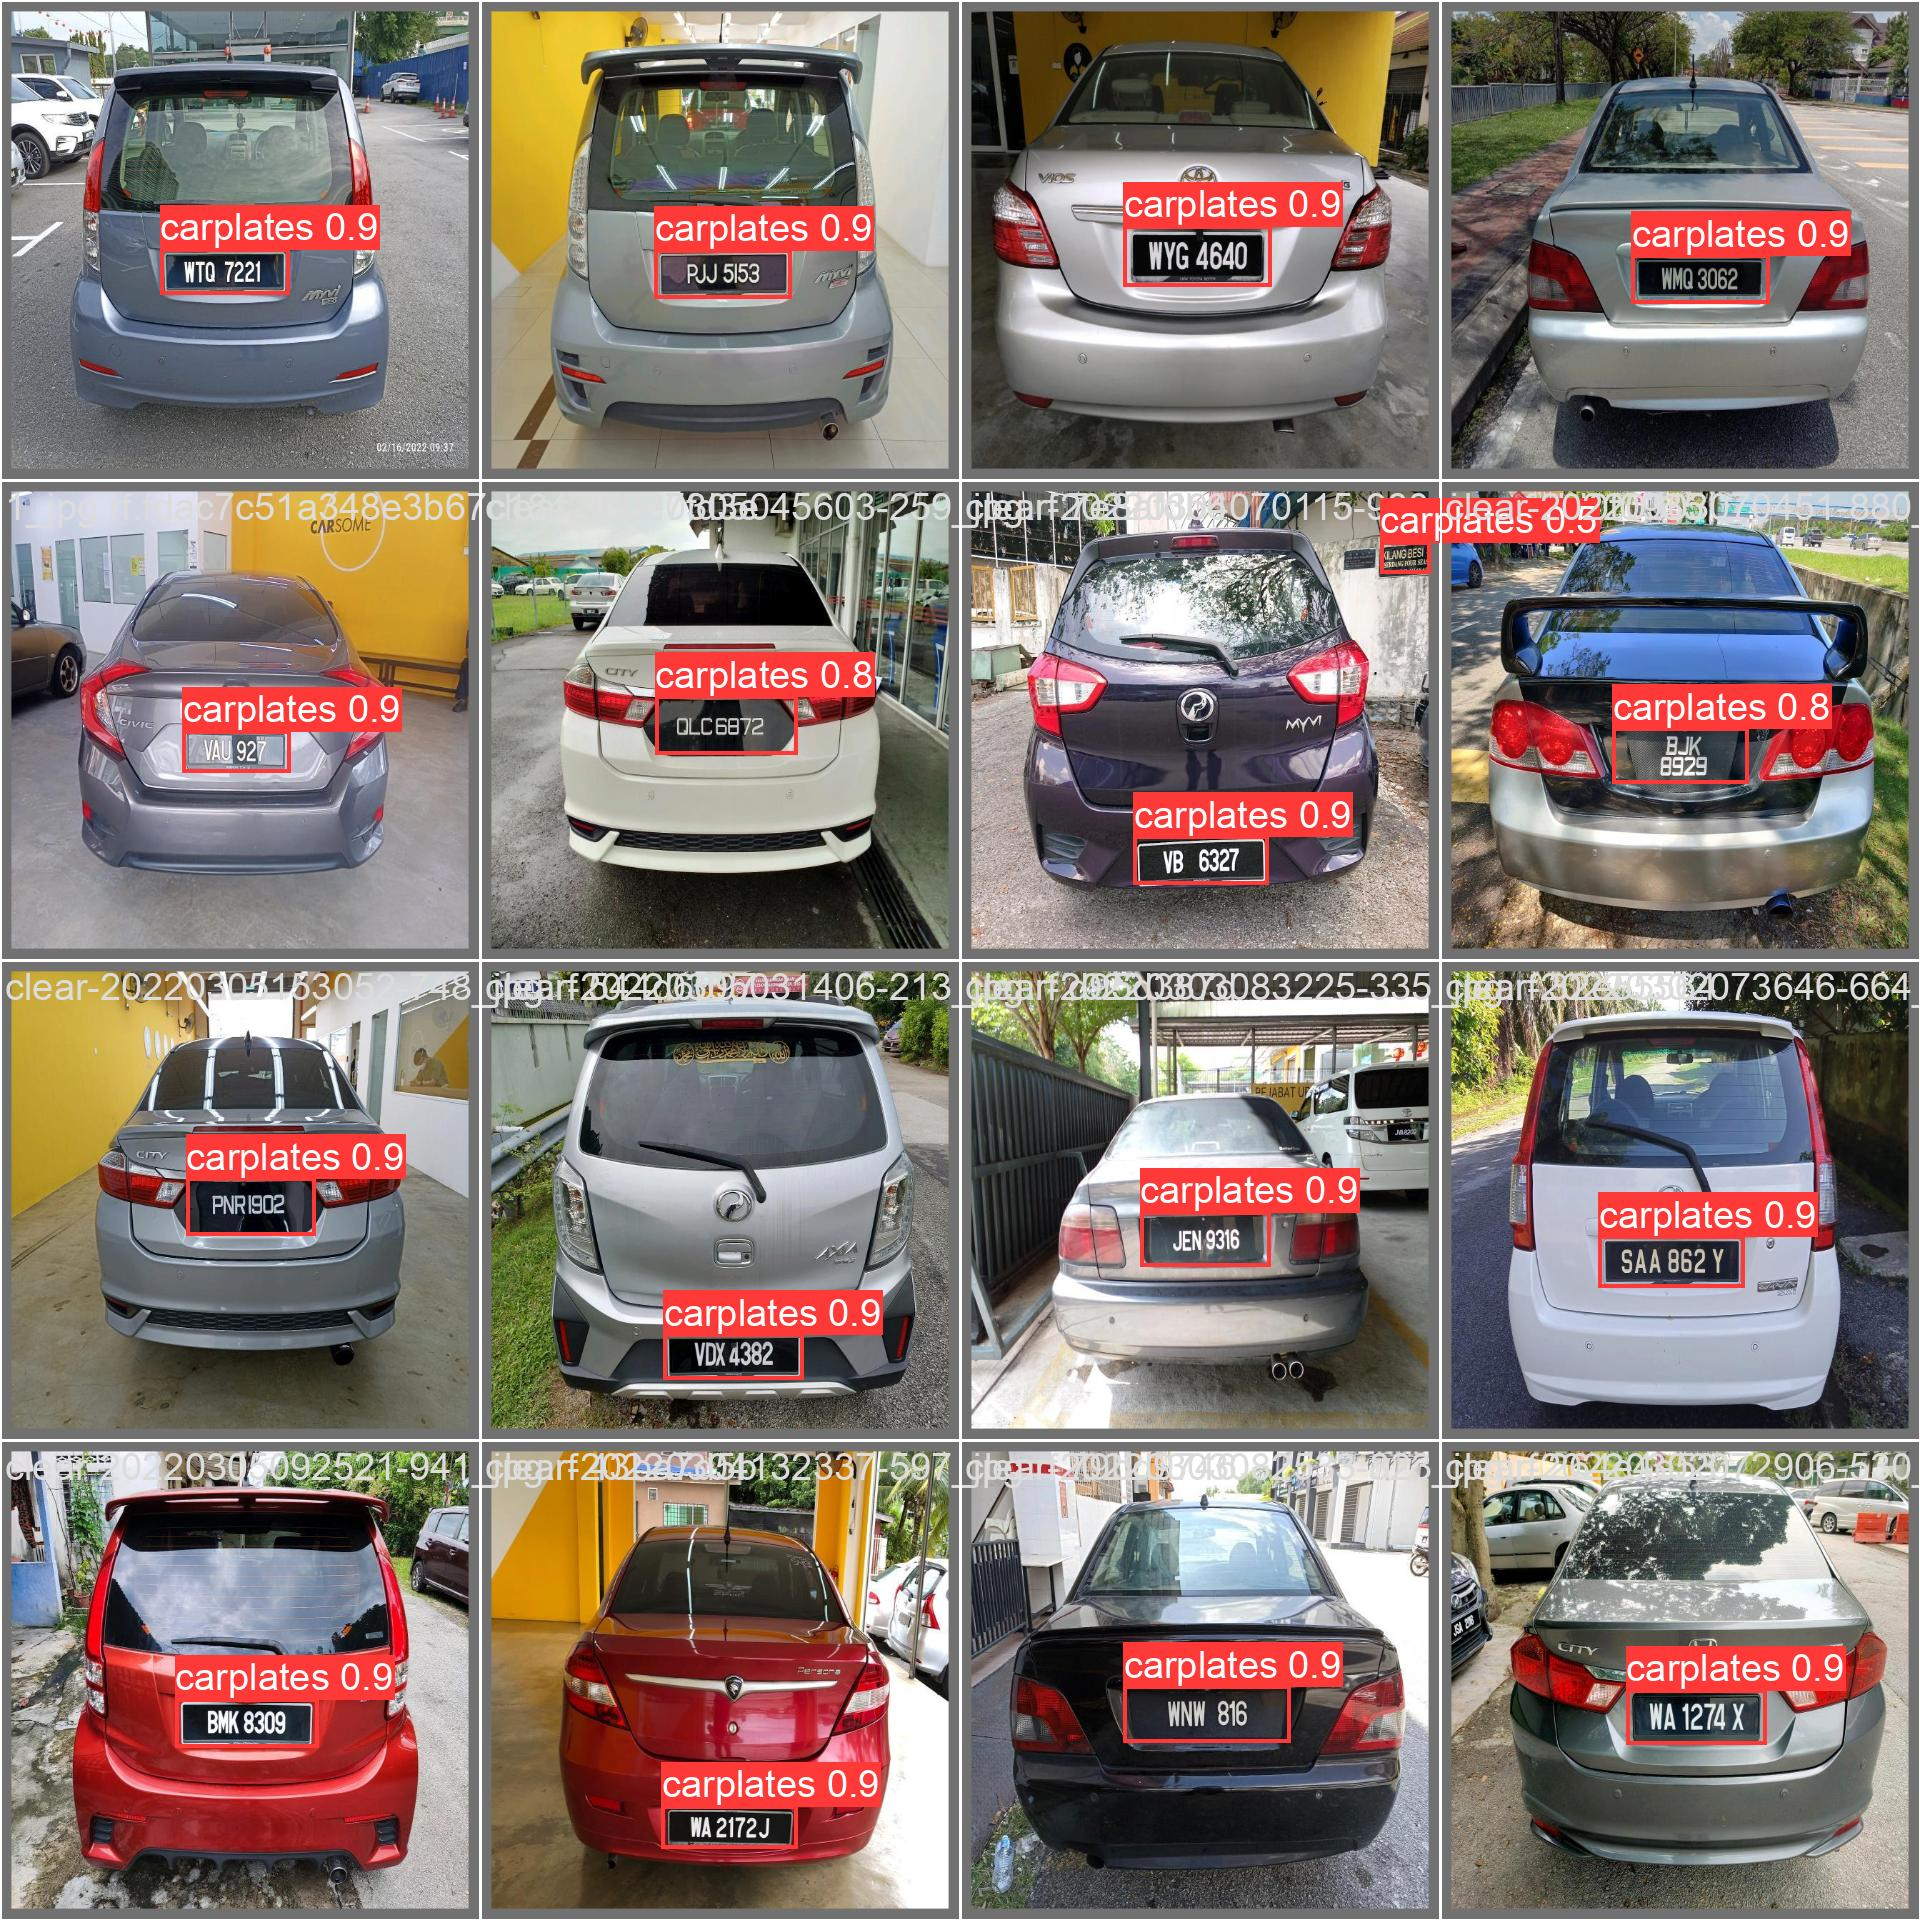

In [17]:
#Model Prediction on validation batch. These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
Image('/content/drive/MyDrive/carplate/runs/detect/train/val_batch0_pred.jpg', width=600)

#**Validate Custom Model**

In [20]:
#Here, we are taking the model best weights and using them to validate the model. Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used before
!yolo task=detect mode=val model=/content/drive/MyDrive/carplate/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/carplate/car-plate-detection-1/data.yaml

2023-10-12 09:41:59.149498: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 09:42:00.686619: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/carplate/car-plate-detection-1/valid/labels.cache... 75 images, 0 backgrounds, 0 corrupt: 100% 75/75 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:04<00:00,  1.15it/s]
                   all         75         75      0.995          1      0.995      0.828
Speed: 3.1m

#**Inference with Custom Model**

In [21]:
# Testing the Model on Test Dataset images
!yolo task=detect mode=predict model=/content/drive/MyDrive/carplate/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/carplate/car-plate-detection-1/test/images

2023-10-12 09:45:39.793610: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 09:45:40.877065: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/75 /content/drive/MyDrive/carplate/car-plate-detection-1/test/images/2_jpg.rf.ab475f0723700c547d339bc88b73d0d1.jpg: 640x640 1 carplates, 37.0ms
image 2/75 /content/drive/MyDrive/carplate/car-plate-detection-1/test/images/clear-20220216042610-850_jpg.rf.9ebc22a0b7dfa11e3d2d630c27752001.jpg: 640x640 1 carplates, 37.0ms
image 3/75 /content/drive/MyDrive/carplate/car-plate

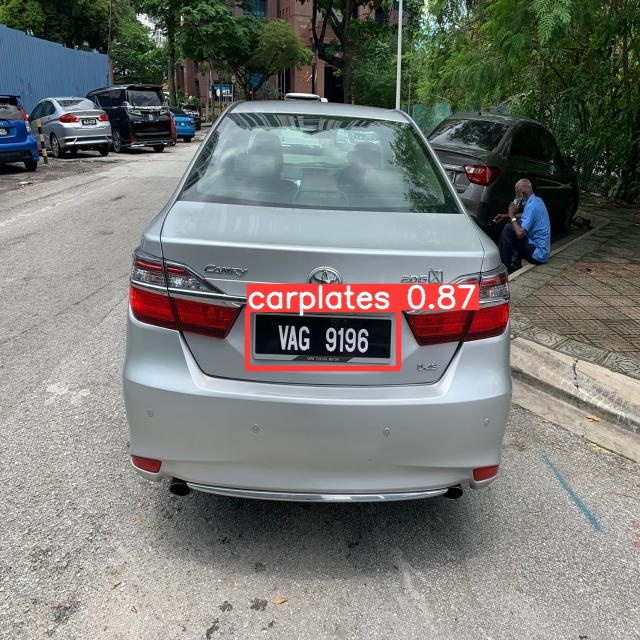

In [24]:
Image("/content/drive/MyDrive/carplate/runs/detect/predict/clear-20220309085034-78_jpg.rf.99f10223f50ed23e0a0d3cd9c0a66a0f.jpg")

#**Testing on a Demo Video**

In [25]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/carplate/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/carplate/demo_car.mp4

2023-10-12 09:57:10.263139: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-12 09:57:11.284634: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/574) /content/drive/MyDrive/carplate/demo_car.mp4: 640x384 120.2ms
video 1/1 (2/574) /content/drive/MyDrive/carplate/demo_car.mp4: 640x384 25.3ms
video 1/1 (3/574) /content/drive/MyDrive/carplate/demo_car.mp4: 640x384 25.2ms
video 1/1 (4/574) /content/drive/MyDrive/carplate/demo_car.mp4: 640x384 25.2ms
video 1/1 (5/574) /content/drive/MyDrive/carplate/demo_car.mp4